In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pylab as plt
from tools import Config
from tools_eco_dyn import system, tau_leap, sys_birth, sys_death
from tools_evo_dyn import tau_leap_symbiosis_mutation, tau

In [2]:
cg_eco = Config(dict(mu = 1.4, alpha = 1.2, gamma = 1.23, p = 0.1, beta = 2.1, 
                     r = 2.3, d = 1.3, rho = 3.6, tau = 1.1008, nu = -0.2))
cg_evo =  Config(dict(eta = 1., g = 0.312, mu = 1.4, alpha = 1.2, gamma = 1.23, p = 0.1, beta = 2.1, 
                      r = 2.3, d = 1.3, theta = 8., v = 1., h = 1.5, nu_max = 3))
init = np.array([0.1, 1., 0.2])
tseries = np.linspace(0, 10, 300)

In [3]:
d = odeint(system, init, tseries, args=(cg_eco,))

In [4]:
np.random.seed(1)
V = 100
ds = tau_leap(init * V, sys_birth, sys_death, 1000, 1, cg_eco, V)

In [5]:
np.random.seed(1)
ds_test = tau_leap_symbiosis_mutation(pop_init = init * V, Tmax = 1000, dt = 1, cg = cg_evo, V = V, 
                                       trait_init = np.array([3.6, -0.2]), sigma_rho = 0.2, sigma_nu = 0.2, 
                                       mutant_rate = 0, step = 1)

In [6]:
tau(np.array([3.6]), np.array([-0.2]), cg_evo)

array([1.10080137])

(0.0, 2.0)

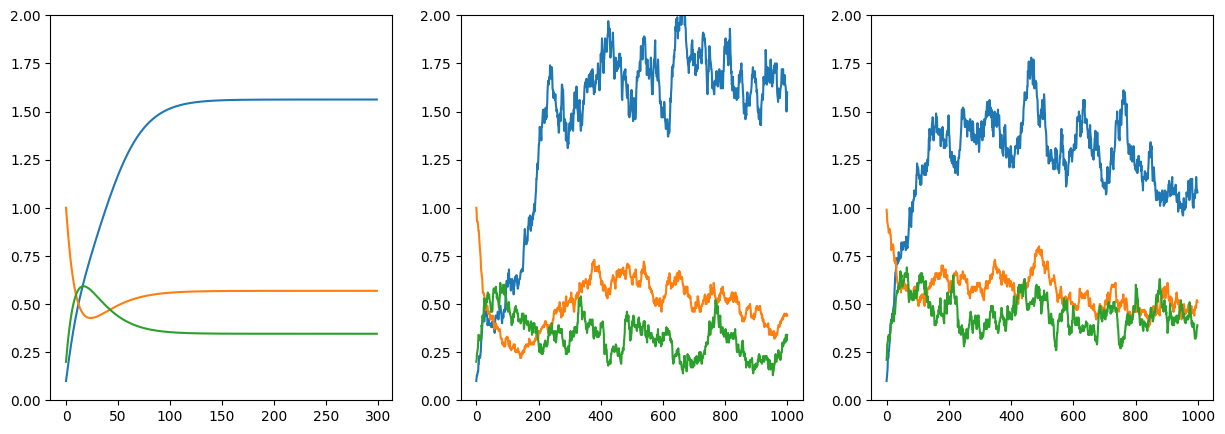

In [7]:
clist = ["C0", "C1", "C2"]
fig, axes = plt.subplots(1, 3, figsize = (15, 5))
for i in range(3):
  axes[0].plot(d[:, i], color = clist[i])
  axes[0].set_ylim(0, 2)
  axes[1].plot(ds['x'][:, i]/V, color = clist[i])
  axes[1].set_ylim(0, 2)
axes[2].plot(ds_test["t"], np.array(ds_test["x_F"])/V,
          color = "C0")
axes[2].plot(np.array(ds_test["x_A"])/V, color = "C1")
axes[2].plot(np.array(ds_test["x_H"])/V, color = "C2")
axes[2].set_ylim(0, 2)
